# Problem Statement:

A consulting firm tracks employee work logs across multiple projects and departments. Management seeks to aggregate this data to evaluate productivity metrics such as total hours worked, average task completion time, and project contributions by department. The challenge is to use pandas to merge, group, and aggregate the data, providing actionable insights for resource allocation and performance reviews.



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('employee-data.csv')
df.head()

,employee_id,department,project,date,hours_worked,tasks_completed
0,503,IT,Gamma,2024-05-07,2.8,4
1,504,Marketing,Alpha,2024-05-19,4.7,3
2,518,Marketing,Beta,2024-05-23,3.5,1
3,513,IT,Alpha,2024-05-31,6.8,1
4,507,IT,Alpha,2024-05-15,2.7,2


In [3]:
df.shape

(100, 6)

In [4]:
df.dtypes

employee_id          int64
department          object
project             object
date                object
hours_worked       float64
tasks_completed      int64
dtype: object

In [5]:
df.isnull().sum()

employee_id        0
department         0
project            0
date               0
hours_worked       0
tasks_completed    0
dtype: int64

# ● How do you calculate total hours worked by each employee?

In [9]:
total_hours = df.groupby('employee_id')['hours_worked'].sum().reset_index()
total_hours

,employee_id,hours_worked
0,501,26.5
1,502,43.3
2,503,41.7
3,504,38.2
4,505,26.6
5,506,31.1
6,507,2.7
7,508,54.7
8,509,37.9
9,511,27.2


# ●	How can you find the average number of tasks completed per department?


In [12]:
average = df.groupby('department')['tasks_completed'].mean().reset_index()
average

,department,tasks_completed
0,Finance,3.476190
1,HR,3.166667
2,IT,2.935484
3,Marketing,3.125000


# ●	Which project had the highest total hours logged?


In [14]:
highest_hours = df.groupby('department')['hours_worked'].max().reset_index()
highest_hours

,department,hours_worked
0,Finance,8.9
1,HR,8.6
2,IT,8.9
3,Marketing,8.9


# ●	How do you merge employee data with department information?

# ●	How can you create a summary table of productivity metrics by department and project?

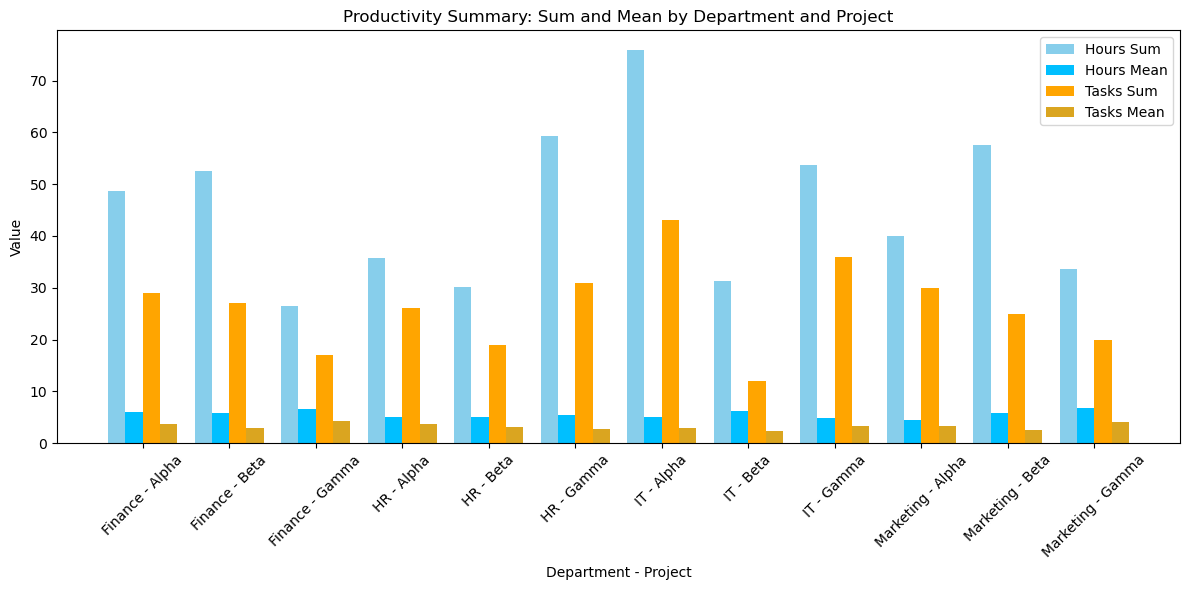

In [33]:
# summary = df.groupby(['department', 'project']).agg({
#     'hours_worked': ['sum', 'mean'],
#     'tasks_completed': ['sum', 'mean', 'count']
# }).reset_index()  


# # Flatten multi-level column names
# summary.columns = ['_'.join(col).strip('_') for col in summary.columns.values]


# summary 

summary = df.groupby(['department', 'project']).agg({
    'hours_worked': ['sum', 'mean'],
    'tasks_completed': ['sum', 'mean']
}).reset_index()

# Flatten multi-level column names
summary.columns = ['department', 'project', 
                   'hours_sum', 'hours_mean', 
                   'tasks_sum', 'tasks_mean']

# Create a group label for plotting
summary['group'] = summary['department'] + ' - ' + summary['project'] 

x = range(len(summary))
bar_width = 0.2

plt.figure(figsize=(12, 6))

# Plotting all 4 bars per group
plt.bar([i - 1.5*bar_width for i in x], summary['hours_sum'], width=bar_width, label='Hours Sum', color='skyblue')
plt.bar([i - 0.5*bar_width for i in x], summary['hours_mean'], width=bar_width, label='Hours Mean', color='deepskyblue')
plt.bar([i + 0.5*bar_width for i in x], summary['tasks_sum'], width=bar_width, label='Tasks Sum', color='orange')
plt.bar([i + 1.5*bar_width for i in x], summary['tasks_mean'], width=bar_width, label='Tasks Mean', color='goldenrod')

# X-axis setup
plt.xticks(x, summary['group'], rotation=45)

# Labels and title
plt.xlabel('Department - Project')
plt.ylabel('Value')
plt.title('Productivity Summary: Sum and Mean by Department and Project')
plt.legend()
plt.tight_layout()
plt.show()
